<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Wrangling Lab**


Estimated time needed: **45** minutes


In this lab, you will perform data wrangling tasks to prepare raw data for analysis. Data wrangling involves cleaning, transforming, and organizing data into a structured format suitable for analysis. This lab focuses on tasks like identifying inconsistencies, encoding categorical variables, and feature transformation.


## Objectives


After completing this lab, you will be able to:


- Identify and remove inconsistent data entries.

- Encode categorical variables for analysis.

- Handle missing values using multiple imputation strategies.

- Apply feature scaling and transformation techniques.


#### Intsall the required libraries


In [1]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 169.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 179.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 147.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 130.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 162.9 MB/s eta 0:00:00


## Tasks


#### Step 1: Import the necessary module.


### 1. Load the Dataset


<h5>1.1 Import necessary libraries and load the dataset.</h5>


Ensure the dataset is loaded correctly by displaying the first few rows.


In [2]:
# Import necessary libraries
import pandas as pd

# Load the Stack Overflow survey data
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(dataset_url)

# Display the first few rows
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


#### 2. Explore the Dataset


<h5>2.1 Summarize the dataset by displaying the column data types, counts, and missing values.</h5>


In [4]:
# Write your code here
instructions = [("data types", df.dtypes), 
                ("data shape", df.shape), 
                ("missing values", df.isna())]

for name, instruction in instructions:
    print(f"{name}:", instruction)
    print("\n"+"="*50+"\n")

data types: ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object


data shape: (65437, 114)


missing values:        ResponseId  MainBranch    Age  Employment  RemoteWork  Check  \
0           False       False  False       False       False  False   
1           False       False  False       False       False  False   
2           False       False  False       False       False  False   
3           False       False  False       False        True  False   
4           False       False  False       False        True  False   
...           ...         ...    ...         ...         ...    ...   
65432       False       False  False       False       False  False   
65433  

<h5>2.2 Generate basic statistics for numerical columns.</h5>


In [5]:
# Write your code here
numerical_cols = df.select_dtypes(include='number').columns.to_list() 
for col in numerical_cols:
    print(f"{col}: ",df[col].describe())
    print("\n"+"="*50+"\n") 
    
df[numerical_cols].describe() 

ResponseId:  count    65437.000000
mean     32719.000000
std      18890.179119
min          1.000000
25%      16360.000000
50%      32719.000000
75%      49078.000000
max      65437.000000
Name: ResponseId, dtype: float64


CompTotal:  count     3.374000e+04
mean     2.963841e+145
std      5.444117e+147
min       0.000000e+00
25%       6.000000e+04
50%       1.100000e+05
75%       2.500000e+05
max      1.000000e+150
Name: CompTotal, dtype: float64


WorkExp:  count    29658.000000
mean        11.466957
std          9.168709
min          0.000000
25%          4.000000
50%          9.000000
75%         16.000000
max         50.000000
Name: WorkExp, dtype: float64


JobSatPoints_1:  count    29324.000000
mean        18.581094
std         25.966221
min          0.000000
25%          0.000000
50%         10.000000
75%         22.000000
max        100.000000
Name: JobSatPoints_1, dtype: float64


JobSatPoints_4:  count    29393.000000
mean         7.522140
std         18.422661
min          

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


### 3. Identifying and Removing Inconsistencies


<h5>3.1 Identify inconsistent or irrelevant entries in specific columns (e.g., Country).</h5>


In [6]:
df["Country"] = df["Country"].fillna("Unknown")

In [7]:
# Write your code here
freq_country = df["Country"].value_counts()
for name, freq in freq_country.items():
    print(f"{name}: {freq}") 

United States of America: 11095
Unknown: 6507
Germany: 4947
India: 4231
United Kingdom of Great Britain and Northern Ireland: 3224
Ukraine: 2672
France: 2110
Canada: 2104
Poland: 1534
Netherlands: 1449
Brazil: 1375
Italy: 1341
Australia: 1260
Spain: 1123
Sweden: 1016
Russian Federation: 925
Switzerland: 876
Austria: 791
Czech Republic: 714
Israel: 604
Turkey: 546
Belgium: 526
Denmark: 504
Portugal: 470
Norway: 450
Romania: 439
Pakistan: 415
Iran, Islamic Republic of...: 411
China: 406
Mexico: 402
Hungary: 396
New Zealand: 396
Greece: 389
Finland: 386
South Africa: 358
Indonesia: 354
Argentina: 345
Bangladesh: 327
Bulgaria: 319
Nigeria: 305
Viet Nam: 296
Japan: 288
Ireland: 270
Taiwan: 268
Egypt: 262
Slovakia: 248
Serbia: 245
Colombia: 217
Philippines: 196
Croatia: 187
Lithuania: 183
Kenya: 180
Singapore: 177
Sri Lanka: 163
Malaysia: 161
Thailand: 147
South Korea: 146
Hong Kong (S.A.R.): 146
Slovenia: 142
Nepal: 139
Chile: 133
United Arab Emirates: 130
Latvia: 128
Estonia: 110
Morocco: 

<h5>3.2 Standardize entries in columns like Country or EdLevel by mapping inconsistent values to a consistent format.</h5>


In [9]:
## Write your code here

df['cleaned_Country'] = df['Country'].apply(
    lambda x: ' '.join(str(x).split(', ')[::-1]) if pd.notna(x) and ',' in str(x) else x
)

df["cleaned_Country"]

0                                 United States of America
1        United Kingdom of Great Britain and Northern I...
2        United Kingdom of Great Britain and Northern I...
3                                                   Canada
4                                                   Norway
                               ...                        
65432                                              Unknown
65433                                              Unknown
65434                                              Unknown
65435                                              Germany
65436                                              Unknown
Name: cleaned_Country, Length: 65437, dtype: object

### 4. Encoding Categorical Variables


<h5>4.1 Encode the Employment column using one-hot encoding.</h5>


In [10]:
## Write your code here
emp_stat = df["Employment"].unique()
emp_stat

array(['Employed, full-time', 'Student, full-time',
       'Student, full-time;Not employed, but looking for work',
       'Independent contractor, freelancer, or self-employed',
       'Not employed, and not looking for work',
       'Employed, full-time;Student, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Employed, full-time;Student, full-time', 'Employed, part-time',
       'Student, full-time;Employed, part-time',
       'Student, part-time;Employed, part-time', 'I prefer not to say',
       'Not employed, but looking for work', 'Student, part-time',
       'Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Student, par

In [11]:
df["Employment"].nunique()

110

In [12]:
df["Employment"] = df["Employment"].fillna("")
df["Employment_split"] = df["Employment"].str.split(";")

employment_hot_code = (
    df.explode("Employment_split")
      .dropna(subset=["Employment_split"])  
      .assign(dummy=1)
      .reset_index()
      .pivot_table(index="index", 
                   columns="Employment_split", 
                   values="dummy", 
                   fill_value=0)
)

df = df.join(employment_hot_code)

df.drop(columns=["Employment_split"], inplace=True)


In [13]:
employment_hot_code 

Employment_split,"Employed, full-time","Employed, part-time",I prefer not to say,"Independent contractor, freelancer, or self-employed","Not employed, and not looking for work","Not employed, but looking for work",Retired,"Student, full-time","Student, part-time"
index,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
65432,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65433,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65434,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 5. Handling Missing Values


<h5>5.1 Identify columns with the highest number of missing values.</h5>


In [14]:
## Write your code here
missing_values = df.isna().sum().sort_values(ascending=False)
missing_values

AINextMuch less integrated                64289
AINextLess integrated                     63082
AINextNo change                           52939
AINextMuch more integrated                51999
EmbeddedAdmired                           48704
                                          ...  
Not employed, and not looking for work        0
Not employed, but looking for work            0
Retired                                       0
Student, full-time                            0
Student, part-time                            0
Length: 124, dtype: int64

<h5>5.2 Impute missing values in numerical columns (e.g., `ConvertedCompYearly`) with the mean or median.</h5>


In [15]:
index = df.index
index 

RangeIndex(start=0, stop=65437, step=1)

In [16]:
## Write your code here
num_missing_comp = df["ConvertedCompYearly"].isna().sum()
num_missing_comp

np.int64(42002)

In [17]:
median_comp = df["ConvertedCompYearly"].median()
df["ConvertedCompYearly"] = df["ConvertedCompYearly"].fillna(median_comp)
df["ConvertedCompYearly"].isna().sum()

np.int64(0)

<h5>5.3 Impute missing values in categorical columns (e.g., `RemoteWork`) with the most frequent value.</h5>


In [18]:
## Write your code here
rem_mode = df["RemoteWork"].mode()[0]
df["RemoteWork"] = df["RemoteWork"].fillna(rem_mode)

df["RemoteWork"].isna().sum()

np.int64(0)

### 6. Feature Scaling and Transformation


<h5>6.1 Apply Min-Max Scaling to normalize the `ConvertedCompYearly` column.</h5>


In [19]:
## Write your code here
df["ConvertedCompYearly"] = (df["ConvertedCompYearly"] - df["ConvertedCompYearly"].min())/(df["ConvertedCompYearly"].max() - df["ConvertedCompYearly"].min())
df["ConvertedCompYearly"] 

0        0.003998
1        0.003998
2        0.003998
3        0.003998
4        0.003998
           ...   
65432    0.003998
65433    0.003998
65434    0.003998
65435    0.003998
65436    0.003998
Name: ConvertedCompYearly, Length: 65437, dtype: float64

<h5>6.2 Log-transform the ConvertedCompYearly column to reduce skewness.</h5>


In [20]:
## Write your code here
df["ConvertedCompYearly"].min()

np.float64(0.0)

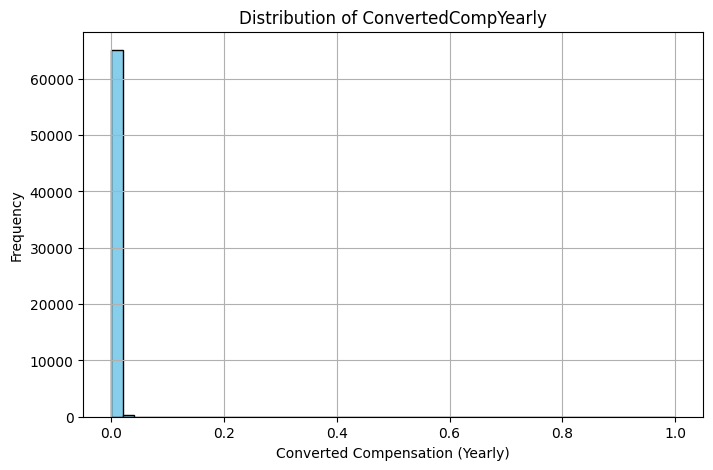

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df["ConvertedCompYearly"].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of ConvertedCompYearly")
plt.xlabel("Converted Compensation (Yearly)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [23]:
!pip install numpy

import numpy as np 
print(np.__version__)

2.2.6


In [24]:
df["ConvertedCompYearly_log"] = np.log1p(df["ConvertedCompYearly"])
df["ConvertedCompYearly_log"] 

0        0.00399
1        0.00399
2        0.00399
3        0.00399
4        0.00399
          ...   
65432    0.00399
65433    0.00399
65434    0.00399
65435    0.00399
65436    0.00399
Name: ConvertedCompYearly_log, Length: 65437, dtype: float64

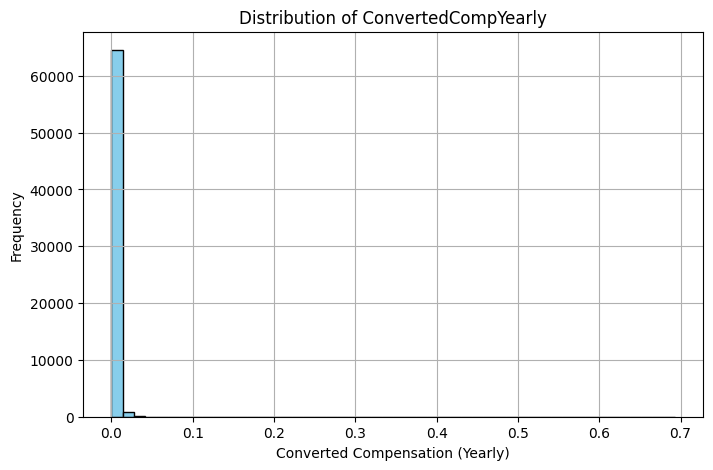

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df["ConvertedCompYearly_log"].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of ConvertedCompYearly")
plt.xlabel("Converted Compensation (Yearly)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [26]:
df["ConvertedCompYearly_restore"] = (df["ConvertedCompYearly"]*(df["ConvertedCompYearly"].max() - df["ConvertedCompYearly"].min())) + df["ConvertedCompYearly"].min()
df["ConvertedCompYearly_restore"]

0        0.003998
1        0.003998
2        0.003998
3        0.003998
4        0.003998
           ...   
65432    0.003998
65433    0.003998
65434    0.003998
65435    0.003998
65436    0.003998
Name: ConvertedCompYearly_restore, Length: 65437, dtype: float64

### 7. Feature Engineering


<h5>7.1 Create a new column `ExperienceLevel` based on the `YearsCodePro` column:</h5>


In [31]:
## Write your code here

df["YearsCodePro"].unique()

array([nan, '17', '27', '7', '11', '25', '12', '10', '3',
       'Less than 1 year', '18', '37', '15', '20', '6', '2', '16', '8',
       '14', '4', '45', '1', '24', '29', '5', '30', '26', '9', '33', '13',
       '35', '23', '22', '31', '19', '21', '28', '34', '32', '40', '50',
       '39', '44', '42', '41', '36', '38', 'More than 50 years', '43',
       '47', '48', '46', '49'], dtype=object)

In [28]:
df["YearsCodePro"].isna().sum()

np.int64(13827)

In [34]:

def convert_years(x):
    if pd.isna(x):
        return np.nan
    elif x == "Less than 1 year":
        return 0.5
    elif x == "More than 50 years":
        return 51
    else:
        try:
            return float(x)
        except:
            return np.nan

df["YearsCodePro_num"] = df["YearsCodePro"].apply(convert_years)

def experience_level(years):
    if pd.isna(years):
        return "Unknown"
    elif years < 4:
        return "Junior"
    elif years < 11:
        return "Mid_level"
    else:
        return "Senior"

df["ExperienceLevel"] = df["YearsCodePro_num"].apply(experience_level)

df[["YearsCodePro", "ExperienceLevel"]] 

,YearsCodePro,ExperienceLevel
0,NaN,Unknown
1,17,Senior
2,27,Senior
3,NaN,Unknown
4,NaN,Unknown
...,...,...
65432,3,Junior
65433,NaN,Unknown
65434,5,Mid_level
65435,2,Junior


### Summary


In this lab, you:

- Explored the dataset to identify inconsistencies and missing values.

- Encoded categorical variables for analysis.

- Handled missing values using imputation techniques.

- Normalized and transformed numerical data to prepare it for analysis.

- Engineered a new feature to enhance data interpretation.


Copyright © IBM Corporation. All rights reserved.
